In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
df = pd.read_excel("Data1.xlsx")

In [31]:
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y')
df.set_index('time', inplace=True)

df.head()

,Year,WS,gas,energy,electricity,CF,Infl
time,,,,,,,
2016-01-01,2016m1,629352.73,71842.03,3361527.74,6439371.21,10502093.71,9.77
2016-02-01,2016m2,619256.31,24461.65,25519198.49,9539113.32,35702029.77,8.06
2016-03-01,2016m3,1034249.13,437484.16,17978764.38,12960102.67,32410600.34,7.26
2016-04-01,2016m4,738253.78,467388.81,14702024.63,8701610.16,24609277.38,7.24
2016-05-01,2016m5,550447.35,285260.38,9382257.40,8823427.36,19041392.49,7.30


ADF Statistic: -1.562966471995675
p-value: 0.5021651137435736
Critical Values: {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

Forecast Summary:
WS                   mean        mean_se  mean_ci_lower  mean_ci_upper
2022-01-01  264039.700195   70464.263055  125932.282410  402147.117980
2022-02-01  254995.109586   71117.022658  115608.306489  394381.912683
2022-03-01  390292.740546   74641.015817  243999.037776  536586.443316
2022-04-01  190116.543255   80111.337926   33101.206167  347131.880343
2022-05-01  138135.272306   87529.832261  -33420.046499  309690.591111
2022-06-01  250094.608673   91115.776564   71510.968184  428678.249161
2022-07-01  386327.182352   92315.622622  205391.886803  567262.477900
2022-08-01  201400.642737   92452.034436   20197.984946  382603.300529
2022-09-01  282853.636159   92931.883457  100710.491568  464996.780750
2022-10-01  295731.213889   95793.850978  107978.716031  483483.711747
2022-11-01  225478.532144   95804.175345   37705.798898  413251.265390
2022-12-01  274402.475522   95801.626185   86634.738540  462170.212504
2023-01-01  350266.913410  105321.256868  143841.043144  55

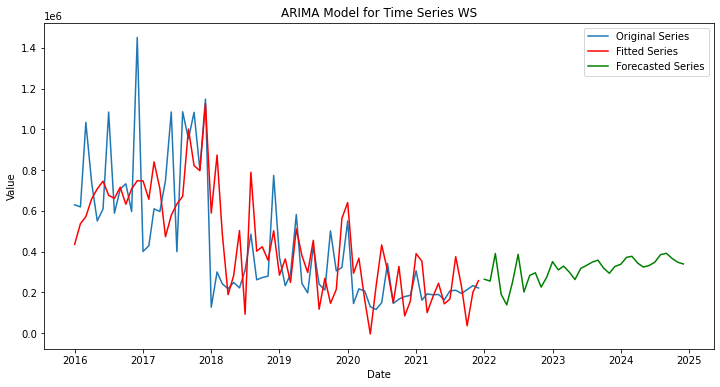

Mean Absolute Error (MAE): 132327.14557855617
Mean Squared Error (MSE): 22791438080.415596


In [32]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

test_stationarity(df['WS'])

d = 0

p = 11
q = 12

model = ARIMA(df['WS'], order=(p, d, q))
results = model.fit()

forecast_steps = 36
forecast = results.get_forecast(steps=forecast_steps)

print("Forecast Summary:")
print(forecast.summary_frame())

plt.figure(figsize=(12, 6))
plt.plot(df['WS'], label='Original Series')
plt.plot(results.fittedvalues, color='red', label='Fitted Series')
plt.plot(forecast.predicted_mean, color='green', label='Forecasted Series')
plt.title('ARIMA Model for Time Series WS')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

actual_values = df['WS'][-forecast_steps:]


mae = mean_absolute_error(actual_values, forecast.predicted_mean)
mse = mean_squared_error(actual_values, forecast.predicted_mean)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

ADF Statistic: -2.1719936346425888
p-value: 0.21656668812713992
Critical Values: {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

ARIMA Model for Energy:
                               SARIMAX Results                                
Dep. Variable:                 energy   No. Observations:                   72
Model:               ARIMA(11, 0, 12)   Log Likelihood               -1238.875
Date:                Sat, 25 Nov 2023   AIC                           2527.749
Time:                        13:39:23   BIC                           2584.666
Sample:                    01-01-2016   HQIC                          2550.408
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.548e+06    2.3e-05   2.85e+11      0.000    6.55e+06    6.55e+06
ar.L1         -0.1535      0.063     -2.430      0.015      -0.277      -0.030
ar.L2          0.1780      0

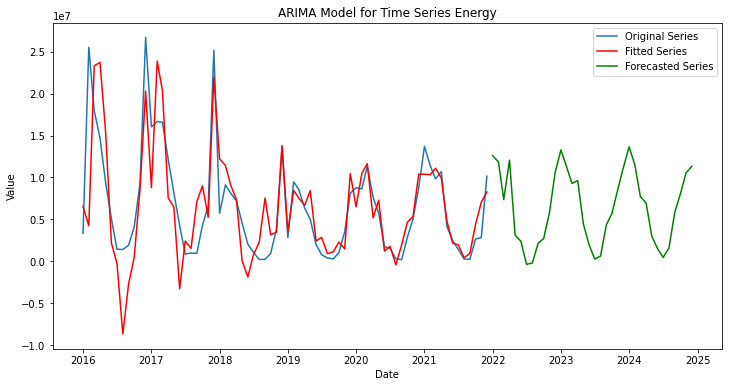

Mean Absolute Error (MAE) for Energy: 2459726.3129680115
Mean Squared Error (MSE) for Energy: 10665969576768.844


In [33]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

test_stationarity(df['energy'])

d = 0

p = 11
q = 12

model_energy = ARIMA(df['energy'], order=(p, d, q))
results_energy = model_energy.fit()

print("ARIMA Model for Energy:")
print(results_energy.summary())

forecast_steps = 36
forecast_energy = results_energy.get_forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df['energy'], label='Original Series')
plt.plot(results_energy.fittedvalues, color='red', label='Fitted Series')
plt.plot(forecast_energy.predicted_mean, color='green', label='Forecasted Series')
plt.title('ARIMA Model for Time Series Energy')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

actual_values_energy = df['energy'][-forecast_steps:]

mae_energy = mean_absolute_error(actual_values_energy, forecast_energy.predicted_mean)
mse_energy = mean_squared_error(actual_values_energy, forecast_energy.predicted_mean)

print(f"Mean Absolute Error (MAE) for Energy: {mae_energy}")
print(f"Mean Squared Error (MSE) for Energy: {mse_energy}")

ADF Statistic: -5.5264813425612624
p-value: 1.8278584084955621e-06
Critical Values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inve

ARIMA Model for Gas:
                               SARIMAX Results                                
Dep. Variable:                    gas   No. Observations:                   72
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -912.680
Date:                Sat, 25 Nov 2023   AIC                           1839.360
Time:                        13:39:24   BIC                           1855.296
Sample:                    01-01-2016   HQIC                          1845.704
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.16e+04   3.84e-07   2.13e+11      0.000    8.16e+04    8.16e+04
ar.L1          1.7161      0.006    268.118      0.000       1.704       1.729
ar.L2         -0.9997      0.00

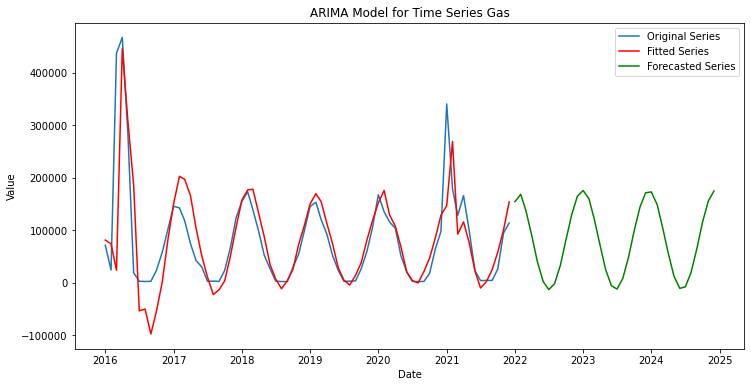

Mean Absolute Error (MAE) for Gas: 41378.904340183966
Mean Squared Error (MSE) for Gas: 3000459090.3128757


In [34]:
test_stationarity(df['gas'])

d_gas = 0
p_gas = 2
q_gas = 3

model_gas = ARIMA(df['gas'], order=(p_gas, d_gas, q_gas))
results_gas = model_gas.fit()

print("ARIMA Model for Gas:")
print(results_gas.summary())

forecast_steps_gas = 36
forecast_gas = results_gas.get_forecast(steps=forecast_steps_gas)

plt.figure(figsize=(12, 6))
plt.plot(df['gas'], label='Original Series')
plt.plot(results_gas.fittedvalues, color='red', label='Fitted Series')
plt.plot(forecast_gas.predicted_mean, color='green', label='Forecasted Series')
plt.title('ARIMA Model for Time Series Gas')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

actual_values_gas = df['gas'][-forecast_steps_gas:]

mae_gas = mean_absolute_error(actual_values_gas, forecast_gas.predicted_mean)
mse_gas = mean_squared_error(actual_values_gas, forecast_gas.predicted_mean)

print(f"Mean Absolute Error (MAE) for Gas: {mae_gas}")
print(f"Mean Squared Error (MSE) for Gas: {mse_gas}")

ADF Statistic: -3.632642084556708
p-value: 0.005166784860274807
Critical Values: {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

ARIMA Model for Electricity:
                               SARIMAX Results                                
Dep. Variable:            electricity   No. Observations:                   72
Model:                 ARIMA(4, 1, 6)   Log Likelihood               -1163.439
Date:                Sat, 25 Nov 2023   AIC                           2348.878
Time:                        13:45:46   BIC                           2373.768
Sample:                    01-01-2016   HQIC                          2358.776
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0574      0.050    -21.008      0.000      -1.156      -0.959
ar.L2         -2.0052      0.058    -34.406      0.000      -2.119      -1.891
ar.L3         -0.9468  

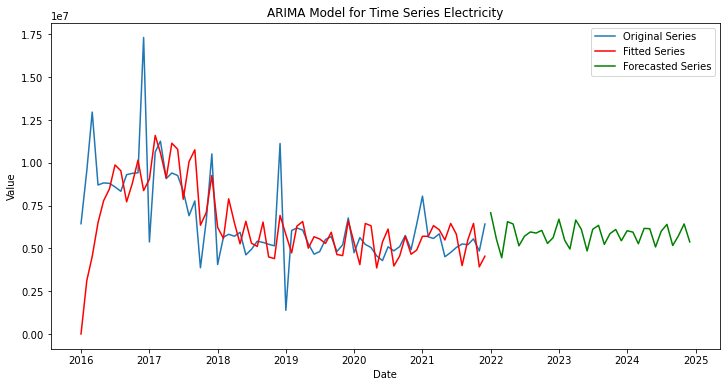

Mean Absolute Error (MAE) for Electricity: 969267.8524769723
Mean Squared Error (MSE) for Electricity: 1923899523888.0874


In [39]:
test_stationarity(df['electricity'])

d_electricity = 1

p_electricity = 4
q_electricity = 6

model_electricity = ARIMA(df['electricity'], order=(p_electricity, d_electricity, q_electricity))
results_electricity = model_electricity.fit()

print("ARIMA Model for Electricity:")
print(results_electricity.summary())

forecast_steps_electricity = 36
forecast_electricity = results_electricity.get_forecast(steps=forecast_steps_electricity)

plt.figure(figsize=(12, 6))
plt.plot(df['electricity'], label='Original Series')
plt.plot(results_electricity.fittedvalues, color='red', label='Fitted Series')
plt.plot(forecast_electricity.predicted_mean, color='green', label='Forecasted Series')
plt.title('ARIMA Model for Time Series Electricity')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

actual_values_electricity = df['electricity'][-forecast_steps_electricity:]

mae_electricity = mean_absolute_error(actual_values_electricity, forecast_electricity.predicted_mean)
mse_electricity = mean_squared_error(actual_values_electricity, forecast_electricity.predicted_mean)

print(f"Mean Absolute Error (MAE) for Electricity: {mae_electricity}")
print(f"Mean Squared Error (MSE) for Electricity: {mse_electricity}")

ADF Statistic: -3.456210268063945
p-value: 0.009185556439701106
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA Model for CF:
                               SARIMAX Results                                
Dep. Variable:                     CF   No. Observations:                   72
Model:                ARIMA(11, 0, 1)   Log Likelihood               -1221.253
Date:                Sat, 25 Nov 2023   AIC                           2470.505
Time:                        13:49:26   BIC                           2502.379
Sample:                    01-01-2016   HQIC                          2483.194
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.408e+07   9.61e-09   1.46e+15      0.000    1.41e+07    1.41e+07
ar.L1         -0.4053      0.141     -2.878      0.004      -0.681      -0.129
ar.L2          0.4466      0.134

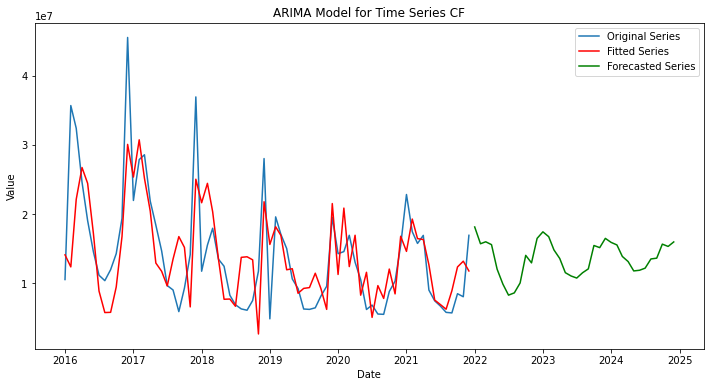

Mean Absolute Error (MAE) for CF: 3955258.587841822
Mean Squared Error (MSE) for CF: 23256614709871.52


In [41]:
test_stationarity(df['CF'])

d_CF = 0

p_CF = 11
q_CF = 1

model_CF = ARIMA(df['CF'], order=(p_CF, d_CF, q_CF))
results_CF = model_CF.fit()

print("ARIMA Model for CF:")
print(results_CF.summary())

forecast_steps_CF = 36
forecast_CF = results_CF.get_forecast(steps=forecast_steps_CF)

plt.figure(figsize=(12, 6))
plt.plot(df['CF'], label='Original Series')
plt.plot(results_CF.fittedvalues, color='red', label='Fitted Series')
plt.plot(forecast_CF.predicted_mean, color='green', label='Forecasted Series')
plt.title('ARIMA Model for Time Series CF')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

actual_values_CF = df['CF'][-forecast_steps_CF:]

mae_CF = mean_absolute_error(actual_values_CF, forecast_CF.predicted_mean)
mse_CF = mean_squared_error(actual_values_CF, forecast_CF.predicted_mean)

print(f"Mean Absolute Error (MAE) for CF: {mae_CF}")
print(f"Mean Squared Error (MSE) for CF: {mse_CF}")
